/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: S

/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: 

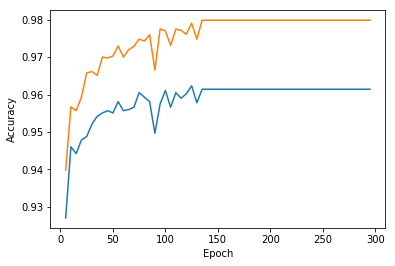

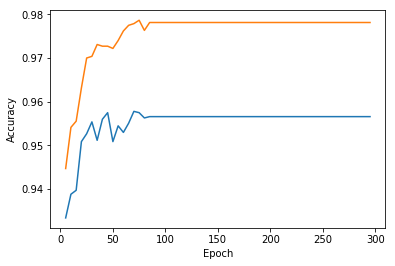

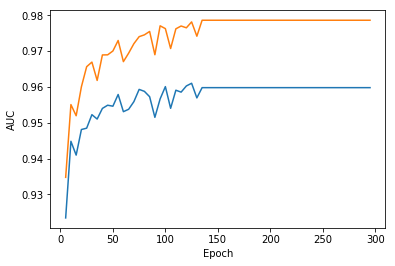

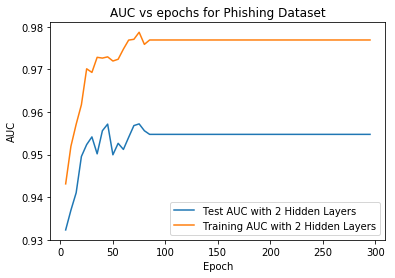

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.neural_network import MLPClassifier

def import_data():
    data1 = pd.read_csv('phishing.csv', sep=',')
    X1 = data1.values[:, 0:-1]
    Y1 = data1.values[:, -1]
 

    return X1, Y1

X1, Y1 = import_data()
X1.shape
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state = 5)

def gridSearchCV(X_train, y_train, hidden_layer_sizes):
    gs = GridSearchCV(estimator=MLPClassifier(activation='relu',
           hidden_layer_sizes=hidden_layer_sizes, learning_rate='constant',
           max_iter=300, random_state=100, solver='sgd'), param_grid={
        'learning_rate_init': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
        'momentum': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}, cv=5)

    gs.fit(X_train, y_train)
    print (gs.best_params_)
    #print (gs.grid_scores_)
    return (gs.best_params_['momentum'], gs.best_params_['learning_rate_init'])

def getEpochCurves(momentum1, learning_rate1, momentum2, learning_rate2, X_train, X_test, y_train, y_test, title, auc):
    #Testing for various epoch results with 1 hidden layer
    fig = plt.figure()
    fig1 = plt.figure()
    fig2 = plt.figure()
    fig3 = plt.figure()
    
    ax = fig.add_subplot(111)
    ax1 = fig1.add_subplot(111)
    ax2 = fig2.add_subplot(111)
    ax3 = fig3.add_subplot(111)
    accuracy_test_1 = []
    accuracy_train_1 = []
    auc_test_1 = []
    auc_train_1 = []
    for i in range(5, 300, 5):
        classifier = MLPClassifier(activation='relu', hidden_layer_sizes=(nodes,), learning_rate='constant',
                      max_iter=i, random_state=100, warm_start=False, momentum=momentum1, \
                                   learning_rate_init=learning_rate1, solver='sgd')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        y_pred_train = classifier.predict(X_train)
        accuracy_test_1.append(accuracy_score(y_test, y_pred))
        accuracy_train_1.append(accuracy_score(y_train, y_pred_train))
        if auc:
            auc_test_1.append(roc_auc_score(y_test, y_pred))
            auc_train_1.append(roc_auc_score(y_train, y_pred_train))

    #Testing for various epoch results with 2 hidden layers
    accuracy_test_2 = []
    accuracy_train_2 = []
    auc_test_2 = []
    auc_train_2 = []
    for i in range(5, 300, 5):
        classifier = MLPClassifier(activation='relu', hidden_layer_sizes=(nodes,nodes), learning_rate='constant',
                      max_iter=i, random_state=100, warm_start=False, momentum=momentum2, \
                                   learning_rate_init=learning_rate2, solver='sgd')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        y_pred_train = classifier.predict(X_train)
        accuracy_test_2.append(accuracy_score(y_test, y_pred))
        accuracy_train_2.append(accuracy_score(y_train, y_pred_train))
        if auc:
            auc_test_2.append(roc_auc_score(y_test, y_pred))
            auc_train_2.append(roc_auc_score(y_train, y_pred_train))

    ax.plot(range(5, 300, 5), accuracy_test_1, label='Test Accuracy with 1 Hidden Layer')
    ax.plot(range(5, 300, 5), accuracy_train_1, label='Training Accuracy with 1 Hidden Layer')
    
    ax1.plot(range(5, 300, 5), accuracy_test_2, label='Test Accuracy with 2 Hidden Layers')
    ax1.plot(range(5, 300, 5), accuracy_train_2, label='Training Accuracy with 2 Hidden Layers')
    
    if auc:
        ax2.plot(range(5, 300, 5), auc_test_1, label='Test AUC with 1 Hidden Layer')
        ax2.plot(range(5, 300, 5), auc_train_1, label='Training AUC with 1 Hidden Layer')
        
        ax3.plot(range(5, 300, 5), auc_test_2, label='Test AUC with 2 Hidden Layers')
        ax3.plot(range(5, 300, 5), auc_train_2, label='Training AUC with 2 Hidden Layers')
        
    
    ax.set_ylabel('Accuracy')
    ax1.set_ylabel('Accuracy')
    ax2.set_ylabel('AUC')
    ax3.set_ylabel('AUC')
    
    ax.set_xlabel('Epoch')
    ax1.set_xlabel('Epoch')
    ax2.set_xlabel('Epoch')
    ax3.set_xlabel('Epoch')
    
    if auc:
        plt.title('AUC vs epochs for ' + title)
    else:
        plt.title('Accuracy vs epochs for ' + title)

    plt.legend()
    plt.show()

# Phishing Dataset - using 1 hidden layer
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3)
num_features = X_train.shape[1]
num_classes = 2
nodes = int((num_classes + num_features) / 2)
#momentum1, learning_rate1 = gridSearchCV(X_train, y_train, (nodes,))
momentum1, learning_rate1 = 0.9, 0.25

# Phishing Dataset - using 2 hidden layer
#momentum2, learning_rate2 = gridSearchCV(X_train, y_train, (nodes, nodes))
momentum2, learning_rate2 = 0.9, 0.3

getEpochCurves(momentum1, learning_rate1, momentum2, learning_rate2, X_train, X_test, y_train, y_test, \
               'Phishing Dataset', True)

In [8]:
def gridSearchCV(X_train, y_train, hidden_layer_sizes):
    gs = GridSearchCV(estimator=MLPClassifier(activation='relu',
           hidden_layer_sizes=hidden_layer_sizes, learning_rate='constant',
           max_iter=300, random_state=100, solver='sgd'), param_grid={
        'learning_rate_init': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
        'momentum': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}, cv=5)

    gs.fit(X_train, y_train)
    print (gs.best_params_)
    #print (gs.grid_scores_)
    return (gs.best_params_['momentum'], gs.best_params_['learning_rate_init'])

momentum1, learning_rate1 = gridSearchCV(X_train, y_train, (nodes,))


/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarnin

/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/subuavudai/Documents/ML/Assignment1/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarnin

{'learning_rate_init': 0.15, 'momentum': 0.8}


In [ ]:
def draw_learning_curve_NN():
    title = "Learning Curve (Phishing)(NN)"
    cv = ShuffleSplit(n_splits=8, test_size=0.2, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2)
    estimator = classifier = MLPClassifier(activation='relu', hidden_layer_sizes=16, learning_rate='constant', random_state=100, warm_start=False, momentum=0.9,learning_rate_init=0.3, solver='sgd')
    plot_learning_curve(estimator, title, X1, Y1, ylim=None, cv=cv)

    plt.show()

draw_learning_curve_NN()